*Ahmad Syauki Asshiddiqie - S1 - Teknik Geodesi dan Geomatika*

***Civilian Movement Prediction during Covid-19***

**Note : Untuk mencetak dokumen, gunakan opsi *'Print - Poster'* pada Adobe Reader, dengan Tile Scale 70%**

Prediksi ini bertujuan untuk memprediksi **Persentase Masyarakat Diam di Rumah (PMDR)** dari tanggal 12 Desember 2021 hingga 13 Januari 2021.
Adapun model yang dibuat nantinya bisa digunakan untuk memprediksi Rasio Berdiam diri untuk hari-hari setelahnya(>13 Januari 2021)

Untuk melihat hasil akhir, dapat langsung menuju 5 baris kode terakhir

Import Packages :

In [1]:
import pandas as pd
import numpy as np

Preprocessing #1 - Filter data dengan atribut 'country' = 'IDN' -> Indonesia.

Adapun raw_data berisikan data 

In [2]:
df = pd.read_csv('movement-range-data-2020-03-01--2020-12-31.txt', sep='\t')

C:\Users\Rifqi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head(5)

,ds,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type
0,2020-03-01,AGO,GADM,AGO.10.10_1,Lubango,-0.02992,0.18751,full_february,DAY_OF_WEEK
1,2020-03-02,AGO,GADM,AGO.10.10_1,Lubango,0.06746,0.10521,full_february,DAY_OF_WEEK
2,2020-03-03,AGO,GADM,AGO.10.10_1,Lubango,0.05873,0.11397,full_february,DAY_OF_WEEK
3,2020-03-04,AGO,GADM,AGO.10.10_1,Lubango,0.01288,0.10492,full_february,DAY_OF_WEEK
4,2020-03-05,AGO,GADM,AGO.10.10_1,Lubango,0.02753,0.11056,full_february,DAY_OF_WEEK


In [4]:
a='IDN'
df2 = df[df['country']==a]

Preprocessing #2 V.1 (Cara Simple) - Filter data dengan atribut "polygon_name" = Nama Kota dan Kabupaten di Jawa Barat :

In [ ]:
#Cek isian dari kolom 'polygon_name' yang berisi nama Kota dan Kabupaten di Indonesia

unique, counts = np.unique(df2['polygon_name'], return_counts = True)
#countspercent = counts/np.sum(counts)
dict(zip(unique,counts))

In [6]:
#Kota dan Kabupaten di Jawa Barat

jabarregion =['Bogor','Sukabumi','Cianjur','Bandung','Garut','Tasikmalaya','Ciamis',
            'Kuningan','Cirebon','Majalengka','Sumedang','Indramayu','Subang','Purwakarta',
            'Karawang','Bekasi','Bandung Barat','Kota Bogor','Kota Sukabumi','Kota Bandung','Kota Cirebon',
            'Kota Bekasi','Kota Depok','Kota Cimahi','Kota Tasikmalaya','Kota Banjar','Pangandaran']

In [7]:
#Checkpoint 1

dfcheckpoint = df2.copy()

In [8]:
df_isin=df2[df2['polygon_name'].isin(jabarregion)]

In [9]:
df_isin['polygon_name'].unique()

#df3 merupakan Table yang isinya sudah difilter sesuai dengan nama Kota dan Kabupaten di Jawa Barat

array(['Garut', 'Indramayu', 'Karawang', 'Kota Bandung', 'Kota Bekasi',
       'Kota Bogor', 'Kota Cirebon', 'Kota Sukabumi', 'Kota Tasikmalaya',
       'Bandung Barat', 'Kuningan', 'Majalengka', 'Purwakarta', 'Subang',
       'Sukabumi', 'Sumedang', 'Tasikmalaya', 'Bandung', 'Bekasi',
       'Bogor', 'Ciamis', 'Cianjur', 'Cirebon'], dtype=object)

Preprocessing #2 Versi 2 (Cara Sulit) - Filtering Menggunakan Logika Pengolahan Matrix

Dikarenakan Coding ini adalah proses melatih logika saya, maka versi yang akan saya gunakan adalah Versi 2 ini.

Preprocessing #2.1 - Pembuatan Classifier Column yang berasal dari Kolom 'polygon_name' dari DataFrame yang masih berisi semua daerah di Indonesia :

In [10]:
classifiercolumn = dfcheckpoint['polygon_name'].copy()
classifiercolumn2 = np.array(classifiercolumn)
classifiercolumn3 = pd.DataFrame(columns=['Region'],data=classifiercolumn2)

Preprocessing #2.2 - Pembuatan Algoritma filtering DataFrame berdasarkan nama daerah yang terdapat dalam list 'jabarregion' pada line 5 :

In [11]:
#Inisialisasi counter array untuk algoritma klasifikasi
counterarr = []

In [12]:
#Pembuatan DataFrame filter yang bersumber dari list 'jabarregion' pada line 5
filt = pd.DataFrame(columns=['Jabar'],data=jabarregion)

In [13]:
# Pengisian counterarr dengan proses looping for. 
# Jika value yang ada di 'filt'(nama daerah di Jabar) == 'classifiercolumn', 
#     maka counterarr[i] akan terisi dengan 1. 
# jika 'filt' != 'classifiercolumn' , maka counterarr[i] akan terisi dengan .
for i in range(filt.shape[0]):
    for j in range(classifiercolumn3.shape[0]):
        if filt['Jabar'][i] == classifiercolumn3['Region'][j]:
            counterarr.append(1)
        else:
            counterarr.append(0)

Preprocessing #2.3 - Reformat Counter Array :

In [14]:
# Mengubah 'counterarr' menjadi Numpy Array (supaya lebih mudah proses matematisnya) bernama 'counter'.
# dan juga cek shape dari 'counter', dimana ukuran 'counter' harus = 27*classifiercolumn.shape[0] 
#      27 berasal dari jumlah item di jabarregion
counter =  np.array(counterarr)
counter.shape[0]

3970431

In [15]:
#Reshape 'counter' menjadi berukuran 147053 x 27
#    147053 = classifiercolumn.shape[0]
counter = counter.reshape(27,int(counter.shape[0]/27)).T
#Proses harus dilakukan seperti diatas, yaitu di reshape lalu transpose, 
#    agar urutan kolom sesuai dengan yang saya inginkan, 
#    dimana masing masing kolom pada tiap baris akan berisi integer 0 atau 1.
#Jika dalam satu baris terdapat kolom yang bernilai 1, 
#    maka baris tersebut berisi data daerah Jawa Barat
#Jika dalam satu baris tidak terdapat kolom yang bernilai 1, 
#    maka baris tersebut berisi data daerah bukan Jawa Barat

In [16]:
#Membuat DataFrame bernama 'counterdf2' dengan kolom 'jabarclassifier' 
#    yang berisi nilai maximal(1 atau 0) dari tiap baris pada 'counter' ,
#    jika 'jabarclassifier' == 1, maka baris tersebut merupakan daerah Jabar
#    jika 'jabarclassifier' == 0, maka baris tersebut bukan daerah Jabar
counterdf = pd.DataFrame(columns = jabarregion,data = counter)
counterdf['jabarclassifier']=counterdf.max(axis=1)

#drop kolom yang tidak dibutuhkan. 
#    Tidak semua item pada jabarregion terdapat pada counterdf.columns.values
#    Maka, saya cek terlebih dahulu nama kolom yang saya akan hapus dengan :
#    counterdf.columns.values

counterdf2 = counterdf.drop(['Bogor','Sukabumi','Cianjur','Bandung','Garut','Tasikmalaya','Ciamis',
            'Kuningan','Cirebon','Majalengka','Sumedang','Indramayu','Subang','Purwakarta',
            'Karawang','Bekasi','Bandung Barat','Kota Bogor','Kota Sukabumi','Kota Bandung','Kota Cirebon',
            'Kota Bekasi','Kota Depok','Kota Cimahi','Kota Tasikmalaya','Kota Banjar','Pangandaran'],axis=1)

In [17]:
#cek shape dari counterdf2, 
#    ukuran counterdf2 harus = 147053(baris dari dataframe yang akan di filter) x 1(jabarclassifier)
counterdf2.shape

(147053, 1)

Preprocessing #2.4 - Drop kolom yang tidak dibutuhkan pada DataFrame utama & menggabungkan DataFrame utama dengan 'counterdf2' :

In [18]:
df2.columns.values
df3 = df2.drop([#'ds',
                'country', 'polygon_source', 'polygon_id', 'baseline_name','baseline_type'],axis=1)

In [19]:
df3.shape

(147053, 4)

In [20]:
#menggabungkan DataFrame dengan 'counterdf2'
df4 = pd.concat([df3.reset_index(drop=True),counterdf2.reset_index(drop=True)],axis=1)

Preprocessing #2.5 - Filtering DataFrame berdasarkan value pada kolom 'jabarclassifier' == 1 :

In [21]:
datajabar = df4[df4['jabarclassifier']==1]

Preprocessing #3 - Formating nama kolom dan mengubah kolom tanggal menjadi bentuk ordinal :

In [22]:
#Mengubah nama kolom supaya lebih mudah diingat
columnsname = ['Tanggal','Daerah', 'PergerakanRelatif', 'RasioBerdiamDiri', 'jabarclassifier']
datajabar.columns = columnsname

In [23]:
datajabar.head(1)

,Tanggal,Daerah,PergerakanRelatif,RasioBerdiamDiri,jabarclassifier
139403,2020-03-01,Garut,0.028,0.19507,1


In [25]:
# berdasarkan dari unique & counts pada line 4, didapat bahwa tiap daerah terdiri dari 306 baris data, 
#    yang mana 306 baris tersebut mewakili 306 hari. 
#    Sehingga, tiap 306 baris, tanggal akan berulang pada daerah yang berbeda. 

# Tanggal saya format menjadi bentuk ordinal.

import datetime as dt
datajabar['Tanggal'] = pd.to_datetime(datajabar['Tanggal'], format = '%Y-%m-%d')
datajabar['HariKe']=datajabar['Tanggal'].map(dt.datetime.toordinal)
datajabar.head(307)

<ipython-input-25-42340e6c3959>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datajabar['Tanggal'] = pd.to_datetime(datajabar['Tanggal'], format = '%Y-%m-%d')
<ipython-input-25-42340e6c3959>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datajabar['HariKe']=datajabar['Tanggal'].map(dt.datetime.toordinal)


,Tanggal,Daerah,PergerakanRelatif,RasioBerdiamDiri,jabarclassifier,HariKe
139403,2020-03-01,Garut,0.02800,0.19507,1,737485
139404,2020-03-02,Garut,0.10211,0.16435,1,737486
139405,2020-03-03,Garut,0.06861,0.18144,1,737487
139406,2020-03-04,Garut,0.00029,0.19883,1,737488
139407,2020-03-05,Garut,0.00264,0.19089,1,737489
...,...,...,...,...,...,...
139705,2020-12-28,Garut,-0.01746,0.25036,1,737787
139706,2020-12-29,Garut,-0.01045,0.26165,1,737788
139707,2020-12-30,Garut,-0.02598,0.25452,1,737789
139708,2020-12-31,Garut,-0.00677,0.24433,1,737790


Preprocessing #4 - Formatting data input (X) untuk model, dimana input berasal dari kolom 'HariKe' yang berisi tanggal dalam bentuk ordinal, yang kemudian saya kurangi 737484, untuk mengurangi magnitude gap pada data. Karena jika inputan bernilai puluhan ribu, sedangkan output/target hanya bernilai 0 s.d. 1, akan menghasilkan model yang kurang bagus :

In [26]:
inputs = (datajabar['HariKe'].iloc[:306]) -737484

In [27]:
inputs

139403      1
139404      2
139405      3
139406      4
139407      5
         ... 
139704    302
139705    303
139706    304
139707    305
139708    306
Name: HariKe, Length: 306, dtype: int64

Preprocessing #5 - Pembuatan dan Formating data target (Y) untuk model, dimana output berasal dari kolom 'PergerakanRelatif' dan 'RatioBerdiamDiri' dari DataFrame 'datajabar':

In [28]:
#Reduksi kolom, dan reformat DataFrame 
#    untuk perhitungan PergerakanRelatif dan RatioDiam total perhari di Jawa Barat
np.set_printoptions(precision=5, threshold = 100)

#Reshape datajabar agar kolom ganjil berisi data Pergerakan Relatif dan kolom genap berisi Rasio Diam Ditempat
datajabar4 = datajabar.drop(['Tanggal','HariKe','Daerah','jabarclassifier'],axis=1).to_numpy().reshape(46,306).T

In [29]:
datajabar4.shape
# 306 merupakan jumlah hari
# 46 merupakan jumlah Jabupaten dan Kota Jawa Barat yang terletak pada DataFrame (23) 
#    dikalikan dengan jumlah variabel (2) yaitu Pergerakan relatif dan Rasio Diam

(306, 46)

In [30]:
datajabar4
# kolom ganjil = pergerakan relatif. Masing2 kolom mewakili 1 Kota/Kabupaten di Jawa Barat
# kolom genap = rasio diam ditempat. Masing2 kolom mewakili 1 Kota/Kabupaten di Jawa Barat
# 1 baris = 1 hari

array([[ 0.028  ,  0.03901, -0.0622 , ...,  0.01337, -0.02687, -0.05779],
       [ 0.19507,  0.18139,  0.23369, ...,  0.20308,  0.17731,  0.16862],
       [ 0.10211,  0.24262,  0.07848, ...,  0.19223,  0.08743,  0.09751],
       ...,
       [ 0.19321,  0.25452,  0.19307, ...,  0.25448,  0.16505,  0.23161],
       [-0.05177, -0.00677,  0.25162, ..., -0.05237, -0.0791 ,  0.08001],
       [ 0.20411,  0.24433,  0.15569, ...,  0.24273,  0.15472,  0.20752]])

In [31]:
#Perhitungan PergerakanRelatif rata-rata Jawa Barat per Hari
PergerakanRelatif = np.absolute(datajabar4[:, 0::2]).mean(axis=1)

#Perhitungan RatioDiam rata-rata Jawa Barat per Hari
RatioDiam = np.absolute(datajabar4[:, 1::2]).mean(axis=1)

#Menggabungkan data untuk di backup
preprocessedjabar= np.column_stack((PergerakanRelatif,RatioDiam))

In [32]:
preprocessedjabar

array([[0.03787, 0.07216],
       [0.19167, 0.19365],
       [0.06711, 0.14098],
       ...,
       [0.18935, 0.24162],
       [0.11435, 0.06767],
       [0.20245, 0.22971]])

Preprocessing #5.1 - Backup Data

In [33]:
#checkpoint
np.savetxt("preprocessedjabar.csv", preprocessedjabar, delimiter=",")

Preprocessing #5.2 - Pembuatan Proporsi Masyarakat Di Rumah (PMDR) --> Target (Y) yang akan dipakai. Saya tidak tahu formulasi pastinya, tapi saya asumsikan proporsi masyarakat dirumah = Rasio dari RatioDiam dengan PergerakanRelatif+RatioDiam :

In [34]:
#ProporsiMasyarakatdiRumah = PMDR (dalam %)
PMDR = (RatioDiam/(RatioDiam+PergerakanRelatif))*100

In [35]:
PMDR

array([65.57979, 50.25625, 67.75116, ..., 56.06389, 37.17897, 53.15425])

In [36]:
#DataFrame akhir
#datapp = Data Pre Processed
datapp = pd.DataFrame(columns = ['inputs','outputs'])
datapp['inputs'] = inputs
datapp['outputs'] = PMDR

Preprocessing #6 - Plotting input ('HariKe') dengan output ('PMDR') untuk melihat model apakah yang cocok untuk digunakan, dan apakah diperlukan transformasi dan reduksi data untuk mempermudah proses regresi/interpolasi/dkk :

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

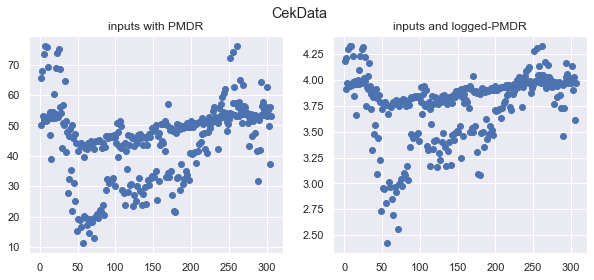

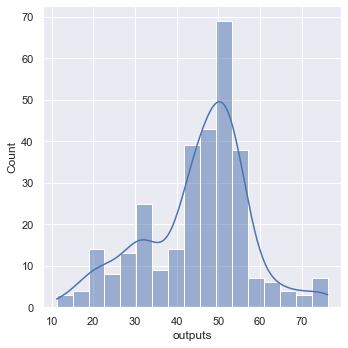

In [261]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (10,4))
fig.suptitle('CekData')
ax1.scatter(datapp['inputs'],(datapp['outputs']))
ax1.set_title('inputs with PMDR')
ax2.scatter(datapp['inputs'],np.log(datapp['outputs']))
ax2.set_title('inputs and logged-PMDR')
plt.show()

#Plot Distribusi PMDR sebelum di reduksi dengan q = 94%
sns.displot(data=datapp['outputs'],kde=True)

Berdasarkan plot diatas, maka **data yang akan digunakan adalah logged-data**, karena lebih "padat". Model regresi yang akan digunakan adalah **Polinomial Reggression**. Dan juga, berdasarkan plot, akan dilakukan reduksi data untuk mengeliminir outlier dan juga membuat distribusi data menjadi lebih normal, sehingga proses regresi akan lebih optimal. **Untuk reduksi, digunakan filter = data > quantile 5%**

In [262]:
q = datapp['outputs'].quantile(0.05)

In [263]:
datapp2 = datapp[datapp['outputs']>q]

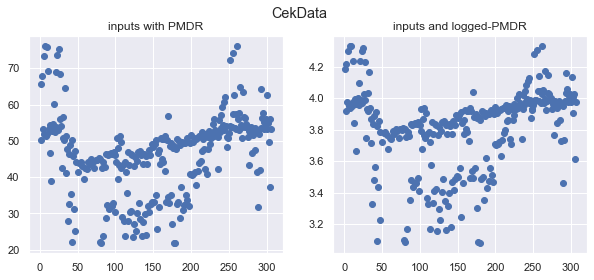

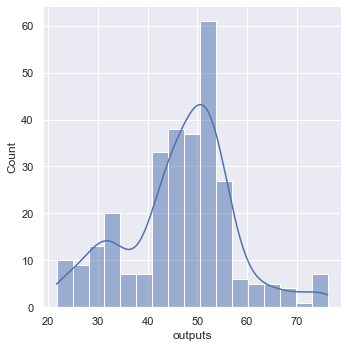

In [269]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (10,4))
fig.suptitle('CekData')
ax1.scatter(datapp2['inputs'],(datapp2['outputs']))
ax1.set_title('inputs with PMDR')
ax2.scatter(datapp2['inputs'],np.log(datapp2['outputs']))
ax2.set_title('inputs and logged-PMDR')
plt.show()

#plot Distribusi PMDR setelah di reduksi dengan q = 5%
sns.displot(data=datapp2['outputs'],kde=True)
plt.show()


(Hasil Plot menunjukkan data insyaallah cukup bagus untuk dijadikan bahan pemodelan)

In [3]:
#chekcpoint
datappakhir = datapp2.copy()
datappakhir.to_csv('C:/Users/Rifqi/Documents/Data Science Penting/datappakhir.csv')

MODELLING :

MODELLING #1 - Import Packages, Splitting Train & Test Data

In [1]:
#Import packages
from sklearn.model_selection import train_test_split as tss
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures as PF

In [ ]:
datappakhir['outputs'] = np.log(datappakhir['outputs'])

In [3]:
#Membagi data untuk model Training dna model Testing. Proporsinya --> Train 80% dan Test 20%.
#Tidak menggunakan data validasi, karena jumlah data sedikit (306) 
#   dan juga model yang digunakan adalah Polinomial Regression yang tidak memmbutuhkan validation dataset

#Data juga tidak di scaling, karena dirasa magnitude gap 
#    antara input dan output tidak terlalu besar/signifikan.

XTrain, XTest, YTrain,YTest = tss(datappakhir['inputs'],datappakhir['outputs'], 
                                  test_size = 0.2, random_state = 29)

MODELLING #2 - Training Model & Menentukan Degree yang paling tepat/efektif berdasarkan perubahan nilai RSquared :

In [4]:
XTrain = XTrain.values.reshape((-1,1))

poly_reg2 = PF(degree = 2)
XTrainPoly2 = poly_reg2.fit_transform(XTrain)
pol_reg2 = LinearRegression()
pol_reg2.fit(XTrainPoly2, YTrain)

poly_reg3 = PF(degree = 3)
XTrainPoly3 = poly_reg3.fit_transform(XTrain)
pol_reg3 = LinearRegression()
pol_reg3.fit(XTrainPoly3, YTrain)

poly_reg4 = PF(degree = 4)
XTrainPoly4 = poly_reg4.fit_transform(XTrain)
pol_reg4 = LinearRegression()
pol_reg4.fit(XTrainPoly4, YTrain)

poly_reg5 = PF(degree = 5)
XTrainPoly5 = poly_reg5.fit_transform(XTrain)
pol_reg5 = LinearRegression()
pol_reg5.fit(XTrainPoly5, YTrain)

LinearRegression()

In [15]:
R2 = pol_reg2.score(poly_reg2.fit_transform(XTrain),YTrain)
R3 = pol_reg3.score(poly_reg3.fit_transform(XTrain),YTrain)
R4 = pol_reg4.score(poly_reg4.fit_transform(XTrain),YTrain)
R5 = pol_reg5.score(poly_reg5.fit_transform(XTrain),YTrain)
print('R2 :',R2,'R3 :',R3,'R4 :',R4,'R5 :',R5)

R2 : 0.2753705370929922 R3 : 0.3821363060369115 R4 : 0.3839467040052562 R5 : 0.38403168868830695


Berdasarkan informasi RSquared dari ke 4 degree tersebut, maka **degree ke-3** lah yang dipilih, karena tidak ada perubahan RSquared yang signifikan dari degree ke-4 dan seterusnya.

MODELLING #3 - Print out Weights & Biases :

didapat persamaan : 

${Y} = {\beta} + w_{1}X_{(1)} + w_{2}X_{(2)}^{2} + w_{3}X_{(3)}^{3}$

${Y} = 4.23 - 0.014X_{(1)} + 0.00009_{2}X_{(2)}^{2} - 0.0000002_{3}X_{(3)}^{3}$

In [74]:
parameterregresi = {'Weight': pol_reg3.coef_ ,'Bias': pol_reg3.intercept_  }
parameter_Regresi = pd.DataFrame(hasilregresi)
parameterregresi


{'Weight': array([ 0.00000000e+00, -1.36940160e-02,  8.94373843e-05, -1.55854364e-07]),
 'Bias': 4.22941433340493}

MODELLING #4 - Cek Plot Data :

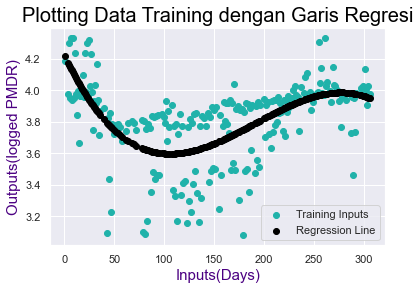

In [77]:
plt.scatter(XTrain, YTrain, c='lightseagreen',label='Training Inputs')
plt.scatter(XTrain, pol_reg3.predict(poly_reg3.fit_transform(XTrain)), c='black',label='Regression Line')
plt.xlabel('Inputs(Days)',c='indigo',size=15)
plt.ylabel('Outputs(logged PMDR)',c='indigo',size=15)
plt.title('Plotting Data Training dengan Garis Regresi', c='black',size=20)
plt.legend()

MODELLING #5 - Menghitung Akurasi Model pada data training (perbedaan antara YHat (hasil prediksi model dari data Training) dengan YTrain (data) :

In [11]:
YHat = pol_reg3.predict(poly_reg3.fit_transform(XTrain))

In [13]:
TrainingAccuracy = np.average((100-(((np.absolute(YHat-YTrain))/YTrain)*100)))
print('Training Accuracy =',TrainingAccuracy,'%')
print('RSqured Value =',R3)

Training Accuracy = 95.74145211115265 %
RSqured Value = 0.3821363060369115


Hasil Akurasi 95,7% namun RSquared bernilai kecil, yaitu 38,2%. Hal ini mungkin disebabkan karena parameter/feature(X) yang digunakan untuk menentukan target(Y) hanya 1, yang kemudian diubah kebentuk Polinomial derajat 3, sedangkan RSquared menunjukan seberapa besar variansi 1 parameter mempengaruhi variansi parameter lainnya. Selain itu, jumlah data yang digunakan mungkin tidak cukup banyak bagi model untuk bisa mempelajari kovariansi data.

MODELLING #5 - Menghitung Akurasi Model pada data testing (perbedaan antara YHatTargets(hasil prediksi model dari data Testing) dengan YTest (data)) :

In [25]:
XTest = XTest.values.reshape((-1,1))
YHatTargets = pol_reg3.predict(poly_reg3.fit_transform(XTest))

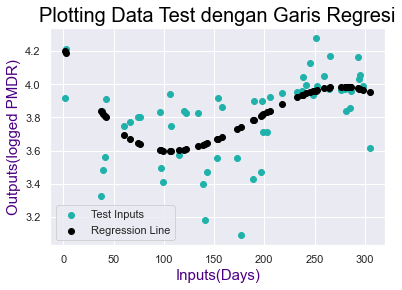

In [78]:
plt.scatter(XTest, YTest, c='lightseagreen',label='Test Inputs')
plt.scatter(XTest, YHatTargets, c='black',label='Regression Line')
plt.xlabel('Inputs(Days)',c='indigo',size=15)
plt.ylabel('Outputs(logged PMDR)',c='indigo',size=15)
plt.title('Plotting Data Test dengan Garis Regresi', c='black',size=20)
plt.legend()

In [28]:
TestAccuracy = np.average((100-(((np.absolute(YHatTargets-YTest))/YTest)*100)))
print('Test Accuracy =',TestAccuracy,'%')

Test Accuracy = 95.61845615850424 %


**Akurasi data Test dianggap Akurasi sebenarnya dari model**

PREDICTING :

PREDIKSI 2 MINGGU KEDEPAN DARI HARI TERAKHIR PADA DATA YANG TERSEDIA (Hari ke 307 s.d. 321 --> 31 Desember 2020 s.d. 13 Januari 2021) :

In [29]:
DayToPredict = np.array([i for i in range(307,321)]).reshape((-1,1))
Poly_DTP = poly_reg3.fit_transform(DayToPredict)

In [30]:
#Karena pada model dilatih dengan data yang telah di logaritma kan, \
#    maka nilai %PMDR yang didapat dari prediksi harus dieksponensialkan, 
#    untuk mendapat %PMDR yang sebenarnya
PMDR_2_Minggu_Kedepan = np.exp(pol_reg3.predict(Poly_DTP))

In [31]:
PMDR_2_Minggu_Kedepan

array([51.6854473 , 51.53572117, 51.38082055, 51.22074687, 51.05550369,
       50.88509671, 50.70953385, 50.52882521, 50.34298311, 50.1520221 ,
       49.95595899, 49.75481284, 49.54860496, 49.33735897])

In [34]:
#Pembuatan DataFrame Hasil Prediksi
import datetime as dt
Prediksi_PMDR_2_Minggu_Kedepan = pd.DataFrame(columns = ['Tanggal', "%PMDR"])
Prediksi_PMDR_2_Minggu_Kedepan['Tanggal'] = [i for i in range(737790,737804)]
Prediksi_PMDR_2_Minggu_Kedepan['Tanggal'] = Prediksi_PMDR_2_Minggu_Kedepan['Tanggal'].map(dt.datetime.fromordinal)
Prediksi_PMDR_2_Minggu_Kedepan['%PMDR'] = PMDR_2_Minggu_Kedepan

In [35]:
Prediksi_PMDR_2_Minggu_Kedepan

,Tanggal,%PMDR
0,2020-12-31,51.685447
1,2021-01-01,51.535721
2,2021-01-02,51.380821
3,2021-01-03,51.220747
4,2021-01-04,51.055504
5,2021-01-05,50.885097
6,2021-01-06,50.709534
7,2021-01-07,50.528825
8,2021-01-08,50.342983
9,2021-01-09,50.152022


***Berdasarkan Output diatas, didapat bahwa untuk dua minggu kedepan, Tren Rasio Masyarakat Yang berdiam diri dirumah akan terus menurun, 
yang berarti kemungkinan Masyarakat akan mulai kembali beraktifitas diluar rumah untuk 2 minggu kedapan. Dan jika tren berlanjut,
maka makin lama kegiatan WFH semakin berkurang, yang mana jika penyebaran COVID-19 tidak terkontrol, maka akan menjadi permasalahan baru.***

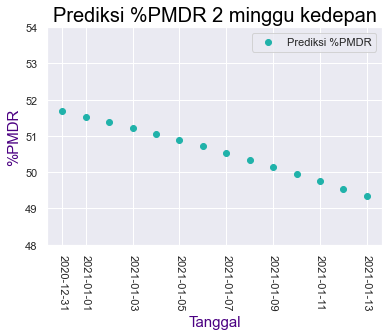

In [81]:
plt.scatter(Prediksi_PMDR_2_Minggu_Kedepan['Tanggal'], 
            Prediksi_PMDR_2_Minggu_Kedepan['%PMDR'], 
            c='lightseagreen',label='Prediksi %PMDR')
plt.xlabel('Tanggal',c='indigo',size=15)
plt.ylabel('%PMDR',c='indigo',size=15)
plt.title('Prediksi %PMDR 2 minggu kedepan', c='black',size=20)
plt.ylim(48,54)
plt.xticks(rotation = 270)
plt.legend()
#plt.savefig('PrediksiPolinomial.png',facecolor='w', edgecolor='w',orientation='landscape')

SAVING :

SAVING #1 - Menyimpan Model yang telah dibuat

In [40]:
#Menyimpan model agar bisa digunakan kembali jika ada data serupa yang akan diprediksi
import pickle
with open('PolyRegModelTestJDS','wb') as file:
    pickle.dump(pol_reg3, file)

SAVING #2 - Menyimpan hasil prediksi

In [41]:
Prediksi_PMDR_2_Minggu_Kedepan.to_excel('HasilPrediksi2MingguTesJDS.xlsx',encoding='utf-8', index =False)

SAVING #3 - Menyimpan Parameter model regresi

In [75]:
parameter_Regresi.to_excel('ParameterRegresiPolinomialTestJDS.xlsx',encoding='utf-8', index =False)